<a href="https://colab.research.google.com/github/Avi04w/Twitter-Analysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# Part 1

In [1]:
!wget 'https://raw.githubusercontent.com/e1444/JSC270a4/main/covid-tweets-train.csv'
!wget 'https://raw.githubusercontent.com/e1444/JSC270a4/main/covid-tweets-test.csv'

--2024-07-20 19:55:31--  https://raw.githubusercontent.com/e1444/JSC270a4/main/covid-tweets-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8991364 (8.6M) [text/plain]
Saving to: ‘covid-tweets-train.csv’

covid-tweets-train. 100%[===================>]   8.57M  --.-KB/s    in 0.1s    

2024-07-20 19:55:31 (61.8 MB/s) - ‘covid-tweets-train.csv’ saved [8991364/8991364]

--2024-07-20 19:55:31--  https://raw.githubusercontent.com/e1444/JSC270a4/main/covid-tweets-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866735 

In [2]:
import pandas as pd
train = pd.read_csv(r"/content/covid-tweets-train.csv")
test = pd.read_csv(r"/content/covid-tweets-test.csv")
train.head()

,Unnamed: 0,OriginalTweet,Sentiment
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
1,1,advice Talk to your neighbours family to excha...,2
2,2,Coronavirus Australia: Woolworths to give elde...,2
3,3,My food stock is not the only one which is emp...,2
4,4,"Me, ready to go at supermarket during the #COV...",0


In [3]:
# merge train and test data
train['dataset'] = 'train'
test['dataset'] = 'test'

# Concatenate train and test data
data = pd.concat([train, test], ignore_index=True)
data.head()

,Unnamed: 0,OriginalTweet,Sentiment,dataset
0,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,train
1,1,advice Talk to your neighbours family to excha...,2,train
2,2,Coronavirus Australia: Woolworths to give elde...,2,train
3,3,My food stock is not the only one which is emp...,2,train
4,4,"Me, ready to go at supermarket during the #COV...",0,train


In [4]:
data.loc[data.dataset == 'train', 'Sentiment'].value_counts()

Sentiment
2            18042
0            15397
1             7712
 PA"             1
 England"        1
Name: count, dtype: int64

In [5]:
# sentiment distribution
data['Sentiment'] = pd.to_numeric(data['Sentiment'], errors='coerce')
data = data.dropna(subset=['Sentiment'])
data.loc[data.dataset == 'train', 'Sentiment'].value_counts()

Sentiment
2.0    18042
0.0    15397
1.0     7712
Name: count, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')

data['tokens'] = data['OriginalTweet'].apply(nltk.word_tokenize)
data['tokens'].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, http...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, :, Woolworths, to, gi...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ,, ready, to, go, at, supermarket, during...
Name: tokens, dtype: object

In [ ]:
import re

# remove links
pattern = re.compile(r'http.*')
data['tokens'] = data['tokens'].apply(lambda tokens: [token for token in tokens if not pattern.match(token)])
data['tokens'].head()

0    [@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, :, /...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, :, Woolworths, to, gi...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ,, ready, to, go, at, supermarket, during...
Name: tokens, dtype: object

In [ ]:
# convert to lowercase
data['tokens'] = data['tokens'].apply(lambda tokens : [token.lower() for token in tokens])
data['tokens'].head()

0    [@, menyrbie, @, phil_gahan, @, chrisitv, :, /...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, :, woolworths, to, gi...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ,, ready, to, go, at, supermarket, during...
Name: tokens, dtype: object

In [ ]:
# remove special characters
pattern = re.compile(r'[^\w\s]')
data['tokens'] = data['tokens'].apply(lambda tokens : [re.sub(pattern, '', token) for token in tokens])
data['tokens'].head()

0    [, menyrbie, , phil_gahan, , chrisitv, , tcoif...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, , woolworths, to, giv...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, , ready, to, go, at, supermarket, during,...
Name: tokens, dtype: object

In [ ]:
# remove empty strings
data['tokens'] = data['tokens'].apply(lambda tokens : [token for token in tokens if token])
data['tokens'].head()

0    [menyrbie, phil_gahan, chrisitv, tcoifz9fan2pa...
1    [advice, talk, to, your, neighbours, family, t...
2    [coronavirus, australia, woolworths, to, give,...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ready, to, go, at, supermarket, during, t...
Name: tokens, dtype: object

In [ ]:
from nltk.stem.porter import *

# stem
stemmer = PorterStemmer()
stemmed_data = data.copy()
stemmed_data['tokens'] = stemmed_data['tokens'].apply(lambda tokens : [stemmer.stem(token) for token in tokens])
stemmed_data['tokens'].head()

0    [menyrbi, phil_gahan, chrisitv, tcoifz9fan2pa,...
1    [advic, talk, to, your, neighbour, famili, to,...
2    [coronaviru, australia, woolworth, to, give, e...
3    [my, food, stock, is, not, the, onli, one, whi...
4    [me, readi, to, go, at, supermarket, dure, the...
Name: tokens, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# remove stop words
sw = stopwords.words('english')[:100]
stemmed_data['tokens'] = stemmed_data['tokens'].apply(lambda tokens : [token for token in tokens if token not in sw])
stemmed_data['tokens'].head()

0    [menyrbi, phil_gahan, chrisitv, tcoifz9fan2pa,...
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronaviru, australia, woolworth, give, elder...
3    [food, stock, not, onli, one, empti, pleas, nt...
4    [readi, go, supermarket, dure, covid19, outbre...
Name: tokens, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize
train = stemmed_data[stemmed_data['dataset'] == 'train']
X_train, y_train = train['tokens'].to_numpy(), train['Sentiment'].to_numpy()


def override_fcn(doc):
  # We expect a list of tokens as input
  return doc

# Count Vectorizer
count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

X_train = count_vec.fit_transform(X_train)

In [ ]:
# vocabulary length
len(count_vec.vocabulary_)

74221

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve
import matplotlib.pyplot as plt

# fit model
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# compute accuracies
y_preds = nb.predict(X_train)

print('Train accuracy with counts:', accuracy_score(y_train, y_preds))

test = stemmed_data[stemmed_data.dataset == 'test']
X_test, y_test = test['tokens'].to_numpy(), test['Sentiment'].to_numpy()

X_test = count_vec.transform(X_test)
y_preds = nb.predict(X_test)

print('Test accuracy with counts:', accuracy_score(y_test, y_preds))

Train accuracy with counts: 0.8192753517532988
Test accuracy with counts: 0.6690363349131122


In [ ]:
# Get the feature log probabilities for each class
feature_log_prob = nb.feature_log_prob_
feature_count = nb.feature_count_

# Get the feature names from the vectorizer
feature_names = np.array(count_vec.get_feature_names_out())

# Number of top features to extract
top_n = 5

# Get the top features for each class
for i, label in enumerate(nb.classes_):
    print(f"Top words for class '{label}':")
    top_features_idx = np.argsort(feature_log_prob[i])[::-1][:top_n]
    top_features = feature_names[top_features_idx]
    top_feature_counts = feature_count[i][top_features_idx]
    for feature, count in zip(top_features, top_feature_counts):
        print(f"{feature}: {count}")

Top words for class '0.0':
coronaviru: 6737.0
covid19: 4610.0
price: 4347.0
food: 3638.0
thi: 3225.0
Top words for class '1.0':
coronaviru: 3812.0
covid19: 2566.0
store: 1588.0
supermarket: 1441.0
price: 1365.0
Top words for class '2.0':
coronaviru: 7511.0
covid19: 5681.0
store: 3917.0
thi: 3781.0
price: 3339.0


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# fitting with TF-IDF
train = stemmed_data[stemmed_data['dataset'] == 'train']
test = stemmed_data[stemmed_data.dataset == 'test']
X_train, y_train = train['tokens'].to_numpy(), train['Sentiment'].to_numpy()
X_test, y_test = test['tokens'].to_numpy(), test['Sentiment'].to_numpy()

count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

X_train = count_vec.fit_transform(X_train)
X_test = count_vec.transform(X_test)

tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_preds = nb.predict(X_train)
print('Train accuracy with TF-IDF:', accuracy_score(y_train, y_preds))

y_preds = nb.predict(X_test)
print('Test accuracy with TF-IDF:', accuracy_score(y_test, y_preds))

Train accuracy with TF-IDF: 0.7250613593837331
Test accuracy with TF-IDF: 0.624275934702475


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# lemmatize tokens
lemmatizer = WordNetLemmatizer()
lemma_data = data
lemma_data['tokens'] = lemma_data['tokens'].apply(lambda tokens : [lemmatizer.lemmatize(token) for token in tokens])
lemma_data['tokens'].head()

0    [menyrbie, phil_gahan, chrisitv, tcoifz9fan2pa...
1    [advice, talk, to, your, neighbour, family, to...
2    [coronavirus, australia, woolworth, to, give, ...
3    [my, food, stock, is, not, the, only, one, whi...
4    [me, ready, to, go, at, supermarket, during, t...
Name: tokens, dtype: object

In [ ]:
train = lemma_data[lemma_data['dataset'] == 'train']
test = lemma_data[lemma_data.dataset == 'test']
X_train, y_train = train['tokens'].to_numpy(), train['Sentiment'].to_numpy()
X_test, y_test = test['tokens'].to_numpy(), test['Sentiment'].to_numpy()

count_vec = CountVectorizer(
    analyzer='word',
    tokenizer= override_fcn,
    preprocessor= override_fcn,
    token_pattern= None)

X_train = count_vec.fit_transform(X_train)
X_test = count_vec.transform(X_test)

tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_preds = nb.predict(X_train)
print('Train accuracy with TF-IDF:', accuracy_score(y_train, y_preds))

y_preds = nb.predict(X_test)
print('Test accuracy with simple TF-IDF:', accuracy_score(y_test, y_preds))

Train accuracy with TF-IDF: 0.7226312847804428
Test accuracy with simple TF-IDF: 0.6119010005265929


# Part 2

### Installing pyLDAvis and downgrading version of pandas because we need access to some older functions

In [ ]:
!pip install --upgrade --upgrade-strategy only-if-needed pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.1 which is incompatible.


In [ ]:
# for some reason, pyLDAvis requires an older version of pandas
!pip install "pandas<2.0.0"

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


### Import Statements

In [ ]:
import tweepy as tw
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
from collections import Counter
import matplotlib.pyplot as plt

### Making query using tweepy to get data

In [ ]:
# Commented out so we do not make another query

# bearer_token = "AAAAAAAAAAAAAAAAAAAAABjFsgEAAAAAlpTaLAR1wJ2sut2HNk8oY2r9u28%3DRWpfy37hyg15PEYEQJAQwhjS9S3RasSkc1WV35KH1FhBPfAgjF"

# client = tw.Client(bearer_token=bearer_token)

# query = 'toronto OR #toronto'

# num_tweets = 500
# tweets = []

# response = client.search_recent_tweets(query, max_results=100)
# tweets.extend(response.data)

# # Continue to fetch tweets until we reach num_tweets or there are no more tweets
# while len(tweets) < num_tweets and 'next_token' in response.meta:
#     response = client.search_recent_tweets(query, max_results=100, next_token=response.meta['next_token'])
#     if response.data is not None:
#         tweets.extend(response.data)
#     else:
#         break  # Exit if there are no more tweets

# # Print the number of tweets collected
# print(f"Collected {len(tweets)} tweets.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Export data to CSV file

In [ ]:
# commented out since we've already exported
# a = [tweet.text for tweet in tweets]
# tweet_text = pd.DataFrame(a, columns = ['tweet'])
# tweet_text.to_csv('tweets.csv', index=False)  # Export to csv, so we only have to make the query once

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Code to retrieve our csv file of tweets which is saved on Github

In [ ]:
!wget 'https://raw.githubusercontent.com/e1444/JSC270a4/main/tweets.csv' # Get csv from github

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-04-04 01:52:42--  https://raw.githubusercontent.com/e1444/JSC270a4/main/tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150352 (147K) [text/plain]
Saving to: ‘tweets.csv’

tweets.csv          100%[===================>] 146.83K  --.-KB/s    in 0.008s  

2024-04-04 01:52:43 (17.2 MB/s) - ‘tweets.csv’ saved [150352/150352]



In [ ]:
tweets = pd.read_csv("/content/tweets.csv")   # Code to extract from csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Look at twitter data
pd.set_option('display.max_colwidth', 80)
tweets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet
0,@ColinDMello I've always wondered who are the folks affording all the multim...
1,Hi! swifties if anyone out there is looking for TAYLOR SWIFT THE ERAS TOUR t...
2,RT @Rules23Jordan: Michael Jordan \n30 Pts\n11 Rbs \n10 Asts \n3 Stls \n50FG...
3,@antonioguterres \nDear the Government of Canada For your information 2002 I...
4,We’re onto Toronto


### Preprocessing the Text

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

texts = tweets['tweet'].tolist()

seed = 80

# Preprocessing function
def preprocess(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs, handles, and the hashtag symbol
    text = re.sub(r'http\S+|www.\S+|@[A-Za-z0-9_]+|#', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Remove stopwords and unwanted words
    stop_words = set(stopwords.words('english'))
    custom_stop_words = {'rt', 'toronto', 'ontario', 'canada', 'amp'}
    all_stop_words = stop_words.union(custom_stop_words)
    tokens = [token for token in tokens if token not in all_stop_words and len(token) > 2]

    # Generate bigrams
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.pmi, 10)
    tokens.extend([' '.join(bigram) for bigram in bigrams])

    return tokens

# Apply preprocessing
processed_texts = [preprocess(text) for text in texts]

# Filter out any empty documents
processed_texts = [tweet for tweet in processed_texts if tweet]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
for t in processed_texts[0:10]:
  print(t)

['ive', 'always', 'wondered', 'folk', 'affording', 'multimillion', 'dollar', 'home', 'guess', 'tax', 'payer', 'funded', 'employee', 'along', 'make', 'sick', 'stomach', 'fam', 'affording multimillion', 'along make', 'always wondered', 'dollar home', 'employee along', 'folk affording', 'funded employee', 'guess tax', 'home guess', 'ive always']
['swifties', 'anyone', 'looking', 'taylor', 'swift', 'era', 'tour', 'ticket', 'rogers', 'centre', 'nov', 'please', 'reach', 'selling', 'cheap', 'price', 'anyone looking', 'centre nov', 'cheap price', 'era tour', 'looking taylor', 'nov please', 'please reach', 'reach selling', 'rogers centre', 'selling cheap']
['michael', 'jordan', 'asts', 'stls', 'wgntv', 'raptor', 'chicago', 'bull', 'april', 'asts stls', 'bull april', 'chicago bull', 'jordan asts', 'michael jordan', 'raptor chicago', 'stls wgntv', 'wgntv raptor']
['dear', 'government', 'information', 'mental', 'breakdown', 'ambulance', 'took', 'north', 'york', 'general', 'hospital', 'admitted', '

### Creating visualition to see most common words

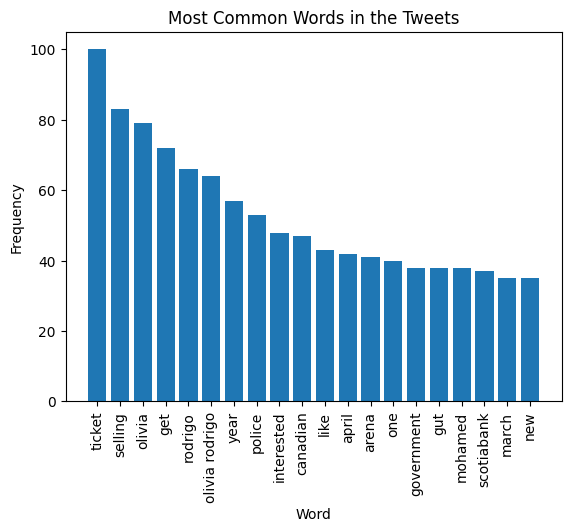

In [ ]:
words = [word for tweet in processed_texts for word in tweet]
c = Counter(words)

# Get the most common words
most_common_words = c.most_common(20)

# Extract the words and their frequencies
words = [word for word, _ in most_common_words]
frequencies = [frequency for _, frequency in most_common_words]

# Create a bar plot
plt.bar(words, frequencies)

# Set the title and axis labels
plt.title('Most Common Words in the Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [ ]:
# @title Split our data
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(processed_texts, test_size=0.3, random_state=seed)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=seed)

### Next we need to create a Document-Term Matrix

In [ ]:
# Create a dictionary representation of the documents
id2word = corpora.Dictionary(train_data)

# Filter out words that occur in less than 20 tweets or more than 80% of the tweets
# This filters out any additional stop words
id2word.filter_extremes(no_below=20, no_above=0.8)

# Create a Bag-of-Words representation of the documents
train_corpus = [id2word.doc2bow(text) for text in train_data]
test_corpus = [id2word.doc2bow(text) for text in test_data]


### Picking Number of Topics

In [ ]:
def compute_coherence_values(corpus, dictionary, k):
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         alpha='auto',
                         eta='auto',
                         iterations=300,
                         num_topics=k,
                         passes=20,
                         eval_every=None,
                         random_state=seed)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=val_data, dictionary=id2word, coherence='c_v')

    return coherence_model_lda.get_coherence()

# Topics range
min_topics = 2
max_topics = 15
topics_range = range(min_topics, max_topics, 1)

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {
    'Topics': [],
    'Coherence': []
    }

for k in topics_range:
    # get the coherence score for the given parameters
    cv = compute_coherence_values(corpus=train_corpus, dictionary=id2word, k=k)
    # Save the model results
    model_results['Topics'].append(k)
    model_results['Coherence'].append(cv)

coherence_scores = pd.DataFrame(model_results)

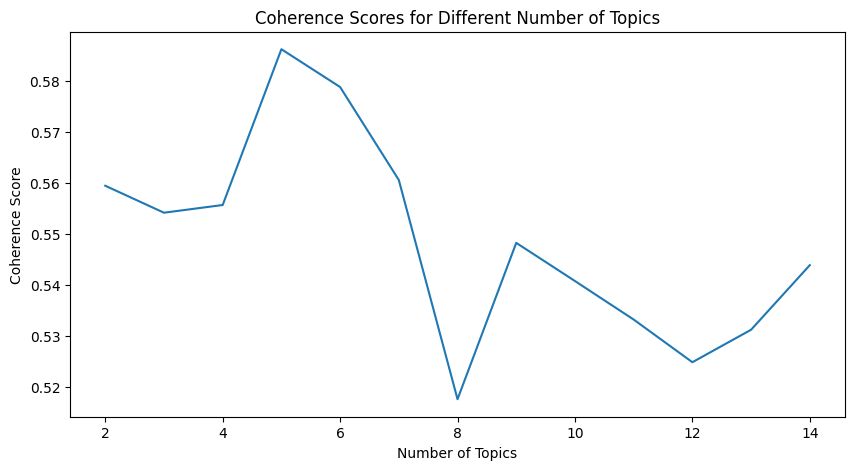

In [ ]:
# Plot the coherence scores
plt.figure(figsize=(10,5))
sns.lineplot(x="Topics", y="Coherence", data=coherence_scores, ci=None)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Number of Topics")
plt.show()

From this graph, we can see that 5 topics is the best number of topics for us to use as it gives the highest coherence score.

### Then we apply the LDA model to our document-term matrix

In [ ]:
 t# Set seed
seed = 80

# Set training parameters
num_topics = 5
passes = 20

# Train the model
lda_model = LdaModel(
    corpus=train_corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    iterations=100,
    num_topics=num_topics,
    passes=passes,
    eval_every=None,
    random_state=seed
)

# Print the Keyword in the num_topics topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.128*"nhl" + 0.110*"point" + 0.101*"doesnt" + 0.096*"fly" + 0.096*"fight" + 0.096*"like" + 0.095*"get" + 0.092*"personally" + 0.092*"personally fly" + 0.074*"life"')
(1, '0.297*"year" + 0.233*"get" + 0.194*"new" + 0.140*"april" + 0.046*"like" + 0.039*"government" + 0.016*"march" + 0.002*"one" + 0.002*"life" + 0.002*"day"')
(2, '0.298*"police" + 0.250*"canadian" + 0.194*"day" + 0.138*"government" + 0.037*"april" + 0.034*"life" + 0.012*"march" + 0.002*"year" + 0.002*"gut" + 0.002*"two"')
(3, '0.544*"one" + 0.353*"star" + 0.005*"olivia" + 0.004*"selling" + 0.004*"interested" + 0.004*"ticket" + 0.004*"march" + 0.004*"rodrigo" + 0.004*"olivia rodrigo" + 0.004*"scotiabank"')
(4, '0.151*"ticket" + 0.137*"olivia" + 0.128*"selling" + 0.107*"rodrigo" + 0.105*"olivia rodrigo" + 0.072*"interested" + 0.068*"arena" + 0.058*"scotiabank" + 0.058*"gut" + 0.054*"two"')


### Checking the accuracy and validating our results

In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=test_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5593812187845668


### Viewing our results

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=test_corpus, texts=test_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=test_corpus, texts=test_data)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# df_dominant_topic.head(10)

In [ ]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']].head(10)

,Topic_Num,Keywords
0,0,"nhl, point, doesnt, fly, fight, like, get, personally, personally fly, life"
1,1,"year, get, new, april, like, government, march, one, life, day"
2,2,"police, canadian, day, government, april, life, march, year, gut, two"
3,3,"one, star, olivia, selling, interested, ticket, march, rodrigo, olivia rodrigo, scotiabank"
4,4,"ticket, olivia, selling, rodrigo, olivia rodrigo, interested, arena, scotiabank, gut, two"


### Visualizing the Clustering with Different Methods

In [ ]:
# Get topic weights and dominant topics ------------x
from sklearn.manifold import TSNE
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[test_corpus]):
    # print(row_list)
    topic_weights.append([w for i, w in row_list])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

output_notebook()
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(5), width = 750, height = 500)

# Create a scatter plot for each topic
for i in range(5):
    # Select the indices for the points belonging to the i-th topic
    indices = [index for index, value in enumerate(topic_num) if value == i]
    # Plot those points with the color and label for the i-th topic
    plot.scatter(x=tsne_lda[indices,0], y=tsne_lda[indices,1],
                 color=mycolors[i], legend_label='Topic ' + str(i + 1))

# Position the legend in the top right corner of the plot
plot.legend.location = "bottom_right"

show(plot)


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 77 samples in 0.000s...
[t-SNE] Computed neighbors for 77 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 77 / 77
[t-SNE] Mean sigma: 0.471829
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.807850
[t-SNE] KL divergence after 750 iterations: 0.014879


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, test_corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.343504 -0.050091       1        1  42.877715
0     -0.225257  0.182970       2        1  17.575690
2     -0.067147 -0.312852       3        1  17.005651
1     -0.200287 -0.030231       4        1  16.487098
3      0.149186  0.210205       5        1   6.053845, topic_info=        Term       Freq      Total Category  logprob  loglift
26       one   6.000000   6.000000  Default  30.0000  30.0000
21    police  10.000000  10.000000  Default  29.0000  29.0000
11      year  10.000000  10.000000  Default  28.0000  28.0000
9   canadian   8.000000   8.000000  Default  27.0000  27.0000
12       get  11.000000  11.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
5    rodrigo   0.044695   9.498742   Topic5  -5.6166  -2.5546
11      year   0.043220  10.146945   Topic5  -5.6502  -2.6541
21    police   0.043482  10.460792   Topic5  -5.6441  -2.6786
12       get   0.043326  11.350039   Topic5  -5.6477  -2.7637
8     ticket   0.046019  13.330973   Topic5  -5.5874  -2.8643

[180 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
28        3  0.165128           april
28        4  0.825642           april
0         1  0.988457           arena
9         3  1.022923        canadian
23        3  1.019999             day
13        2  1.054623          doesnt
14        2  0.826396           fight
15        2  0.826397             fly
12        2  0.264316             get
12        4  0.704843             get
10        3  0.810782      government
10        4  0.162156      government
1         1  0.949911             gut
2         1  0.926819      interested
24        2  0.763845            life
24        3  0.254615            life
20        2  0.585693            like
20        4  0.390462            like
22        1  0.884657           march
22        4  0.176931           march
29        4  1.048635             new
16        2  1.048857             nhl
3         1  0.989962          olivia
4         1  0.968050  olivia rodrigo
26        5  1.015719             one
17        2  0.865085      personally
18        2  0.865085  personally fly
19        2  0.971469           point
21        3  0.955951          police
5         1  0.947494         rodrigo
6         1  0.949984      scotiabank
7         1  0.972198         selling
25        5  0.884444            star
8         1  0.975173          ticket
27        1  1.028821             two
11        4  0.985518            year, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4])